# CS5228 Assignment 1 - EDA, Data Preparation & K-Means

Hello everyone, this assignment notebook covers EDA, Data Preparation & K-Means. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:**
* Rename and save this Jupyter notebook as **cs5228_a1_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a1_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a1_script.py* as **cs5228_a1_YourName_YourNUSNETID.py** (e.g., **cs5228_a1_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Thursday, Sep 14, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [4]:
student_id = 'A0285647M'
nusnet_id = 'e1216292'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Exploratory Data Analysis (EDA) & Data Preparation (30 Points)**
    * 1.1 Removing "Dirty" Records (6 Points)
    * 1.2 Handling Missing (NaN) Values (6 Points)
    * 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)
        * 1.3 a) Appropriate Steps (4 Points)
        * 1.3 b) Additional Considerations (2 Points)
    * 1.4 Handling Categorical Attributes (4 Points)
    * 1.5 Basic Facts about Dataset (8 Points)
* **2 K-Means (20 Points)**
    * 2.1 Performing K-Means "By Hand" (4 Points)
        * 2.1 a) Find Clusters for K=3 (2 Points)
        * 2.1 b) Evaluate the Result (2 Points)
    * 2.2 Initializing Centroids (10 Points)
        * 2.2 a) Implement Initialization of Centroids (6 Points)
        * 2.2 b) Interpreting MaxDist Initialization (2 Points)
        * 2.2 c) Interpreting KMeans++ Initialization (2 Points)
    * 2.3 Questions about K-Means (6 Points)
        * 2.3 a) Empty Cluster (3 Points)
        * 2.3 b) Outlier Detection (3 Points)

## Setting up the Notebook

### Enable Auto-Reload

This ensures that any saved changes to your `.py` file gets automatically reloaded.

In [5]:
%load_ext autoreload
%autoreload 2

### Enable "Inline Plotting"

In [6]:
%matplotlib inline

### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd

from src.utils import *

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a1.py`, you also need to edit the import statement below accordingly.

In [2]:
from cs5228_a1_ParasharaRamesh_e1216292  import *
#from A1a_BobSmith_e12345678 import * # <-- you will need to rename this accordingly

## 1. Exploratory Data Analysis (EDA) & Data Preparation

### 1.1 Removing "Dirty" Records (6 Points)

Assume that you have been tasked to build a regression model to predict the **resale prices of used cars** in Singapore. To this end, you get a dataset containing information about 15,000 past resale transactions, including the following information about the attributes:

* **listing_id**: Unique ID of the listing; an integer number uniquely assigned to each listing. If this code starts with the letter 'C', it indicates a cancellation of the listing and is this an invalid listing.
* **url**: URL of the website where the listing is posted as string value
* **make**: The make/brand of the car as a string value of a valid car make (e.g., "bmw", "honda", "mazda", "toyota", "mercedes-benz").
* **model**: The model of the car as a string value of a valid car model (e.g., "e250", "outlander", "v60", "x1", "qashqai").
* **manufactured**: The year the car has been manufactured as an integer value.
* **type_of_vehicle**: The type of the car as a string value of a valid vehicle type (e.g., "luxury sedan", "mid-sized sedan", "suv", "hatchback").
* **power**: The power of the engine as an integer value in kW (kilowatt)
* **engine_cap**: Size/capacity of the engine as integer value in cc (cubic centimeter)
* **curb_weight**: the weight of the vehicle including a full tank of fuel and all standard equipment in kg (kilogram)
* **no_of_owners**: Number of previous owners as integer value >= 1 (used cars only).
* **mileage**: Mileage of car as integer value in km (kilometer)
* **price**: Resale price of the car in Singapore dollars.

Let's have a first look at the data:

In [9]:
df_cars_dirty = pd.read_csv('data/a1-used-cars-resale-dirty.csv')

df_cars_dirty.head(10)

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,983884,https://www.sgcarmart.com/listing/983884,nissan,qashqai,2015,suv,85,1197,1285,2,80000,52800
1,1026259,https://www.sgcarmart.com/listing/1026259,volkswagen,golf,2010,sports car,188,1984,1466,6,149000,105800
2,1002033,https://www.sgcarmart.com/listing/1002033,suzuki,vitara,2016,suv,88,1586,1160,1,84000,55800
3,1030109,https://www.sgcarmart.com/listing/1030109,kia,picanto,2007,hatchback,47,1086,852,2,105000,8888
4,1013252,https://www.sgcarmart.com/listing/1013252,porsche,cayenne,2014,suv,193,2967,2185,3,108650,162800
5,1026589,https://www.sgcarmart.com/listing/1026589,toyota,c-hr,2018,suv,90,1797,1440,1,50000,93000
6,1024394,https://www.sgcarmart.com/listing/1024394,bmw,x4,2014,suv,225,2979,1815,2,78000,128000
7,1014304,https://www.sgcarmart.com/listing/1014304,toyota,corolla,2012,mid-sized sedan,90,1598,1195,3,130000,18900
8,1003345,https://www.sgcarmart.com/listing/1003345,mercedes-benz,amg,2010,sports car,200,3498,1765,3,117000,106088
9,1022878,https://www.sgcarmart.com/listing/1022878,mercedes-benz,c180,2009,luxury sedan,115,1796,1495,3,108000,65800


In [10]:
print('Number of records: {}'.format(len(df_cars_dirty)))

Number of records: 15000


If you check the dataset against its description as given above -- with the help of `pandas` or by simply inspecting the raw data file -- you will notice that many records are "dirty", meaning they are not in the expected format. Dirty records can negatively affect any subsequent analysis it needs.

**Perform EDA on the Used Cars Resale Price dataset and perform appropriate preprocessing steps to clean the data!**
The preprocessing step for cleaning the data step may include
* the *removal* of "dirty records" or
* the *modification* of "dirty records" records

**Task 1: Identify at least 3 issues** with the dataset that would negatively affect any subsequent analysis, and clean the data accordingly.

**Important:**

* Recall from the lecture that data cleaning often involves making certain decisions. As such, you might come up with different steps than other students. This is OK as long as you can reasonably justify your steps.
* The goal is to preserve as much of the records as possible! So only remove records as part of your data cleaning if it's really necessary (this includes that you should not remove any attributes!). There might be different valid cases, so don't forget to briefly justify your decision.
* For this task, we are **not** trying to identify "noise" (e.g., outliers in the form of suspicious values) or `NaN` values; this will be covered later. Here, we look for records with values not eligible to be used for an analysis because they do not adhere to the data description.

Please provide your answer below. It should list the different issues you have identified and briefly discuss which data cleaning steps you can and/or need to perform to address those issues.

**Your answer:**
Here are the issues from the given dataset:
1. the "**manufactured**" column has values which are greater than the current year (i.e. in the future). These values have to be removed
2. the "**no_of_owners**" column has values which are lesser than 1. (e.g. -1 in many places which doesn't make sense as this is supposed to be a positive number greater than 1 to indicate no of owners who owned this car previously
3. the "**curb_weight**" column is supposed to be a number indicating the weight, but there are also lots of values which are strings (e.g. "XXXXX")


**Task 2: Complete the method `clean` in the `.py` file to actually implement your steps for handling "dirty" records!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [14]:
df_cars_cleaned = clean(df_cars_dirty)

print('After preprocessing, there are now {} records.'.format(df_cars_cleaned.shape[0]))

#The numbers match my initial analysis

After preprocessing, there are now 13972 records.


### 1.2 Handling Missing (NaN) Values (6 Points)

Many traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our used cars resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [15]:
df_cars_nan = pd.read_csv('data/a1-used-cars-resale-nan.csv')

df_cars_nan.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1023911,https://www.sgcarmart.com/listing/1023911,toyota,corolla,2009,mid-sized sedan,81,1496,1130.0,3,127450.0,20800.0
1,1022346,https://www.sgcarmart.com/listing/1022346,toyota,estima,2007,mpv,125,2362,1710.0,4,103000.0,52500.0
2,1017880,https://www.sgcarmart.com/listing/1017880,citroen,c3,2018,suv,81,1199,1203.0,1,35000.0,68000.0
3,1022468,https://www.sgcarmart.com/listing/1022468,renault,grand,2015,mpv,81,1461,1539.0,1,80848.0,52800.0
4,1026440,https://www.sgcarmart.com/listing/1026440,mercedes-benz,e200,2009,luxury sedan,135,1796,1615.0,2,116199.0,73800.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here.

**Task 1: Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Please provide your answer in the markdown cell below list all issues concerning `NaN` values and how you would handle them with a brief justification for your approach. Additional (simplifying) guidelines:

* The goal is to preserve as many records in the dataset as possible.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset)
* Ignore more sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.

**Your Answer:**

By using a profiling tool called as "pandas_profiling" ( generated html report is present in the same report). It is clear that the following columns have missing values:

1. url
2. make
3. mileage
4. price

Since url and make are arbitrary strings for which nothing can be figured out in terms of filling the missing value we can just remove all the rows where "url" and "make" are NaN

However, for price and mileage we can perhaps compute the average value and fill it up


In [16]:
print(f"No of points in the df_cars_nan dataframe is {len(df_cars_nan)}")

No of points in the df_cars_nan dataframe is 15000


**Task 2: Complete the method `handle_nan` in the `.py` file to actually implement your steps for handling `NaN` values!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [21]:
df_cars_no_nan = handle_nan(df_cars_nan)

print('After handling missing values, there are now {} records.'.format(df_cars_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_cars_no_nan.isna().sum(axis=1) > 0).sum()))

After handling missing values, there are now 12604 records.
Number of records with an NaN for any attribute: 0


### 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaning analysis results.

For this subtask, we use a version of our Used Cars Resale dataset **with no "dirty" records or missing data**! Note that this dataset has a few more attributes: `eco_category`, `transmission`, and `reg_date` (registration date). Let's have a look:

In [22]:
df_cars_others = pd.read_csv('data/a1-used-cars-resale-other.csv')

df_cars_others.head()

,listing_id,url,make,model,manufactured,reg_date,type_of_vehicle,eco_category,transmission,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1004862,https://www.sgcarmart.com/listing/1004862,Lamborghini,gallardo,2011,06-jan-2012,sports car,uncategorized,auto,412,5204,1500,5,49000,362800
1,1004953,https://www.sgcarmart.com/listing/1004953,Mitsubishi,attrage,2016,31-jul-2017,mid-sized_sedan,uncategorized,auto,57,1193,940,2,90000,43800
2,1031276,https://www.sgcarmart.com/listing/1031276,toyota,vios,2018,21-nov-2018,mid-sized sedan,uncategorized,auto,79,1496,1085,1,20270,56666
3,1024287,https://www.sgcarmart.com/listing/1024287,volkswagen,golf,2016,18-nov-2016,hatchback,uncategorized,auto,81,1197,1229,1,60000,54200
4,1023453,https://www.sgcarmart.com/listing/1023453,bmw,216d,2016,24-nov-2016,mpv,uncategorized,auto,85,1496,1480,2,80000,103000


#### 1.3 a) Appropriate Steps (4 Points)

**List at least 4 data cleaning / data preprocessing steps you deem appropriate to apply to the dataset above!** Please provide your answer in the markdown cell below list all steps together with a justification for your decision. Additional (simplifying) guidelines:

* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task is very likely to affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `model` is indeed an existing car model.
* Please do not address the concept of attribute encoding -- that is, the encoding of categorical attributes as numerical attributes -- in this subtask. This comes later.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**

1. We can drop the 'listing_id' column as this column does not have any positive correlation in figuring out the price
2. We can drop the 'url' column as this column does not have any positive correlation in figuring out the price
3. The 'eco_category' has nothing insightful to offer as all the values are just "uncategorized". Therefore we can safely drop this column!
4. The 'manufactured' has dates which are set in the future i.e. > 2023 which need to be fixed . We can refer to the year value in the column 'reg_date'
5. There are also a handful of values in the 'manufactured' column which does not match the year value in the 'reg_date' column which can be rectified
6. As an additional data transformation task we can convert the date value in the 'reg_date' into something more consistent like a unix timestamp.

#### 1.3 b) Additional Considerations (2 Points)

So far, we handled "dirty" records, missing values, and other types of (arguably) straightforward EDA/preprocessing steps. This means that we performed important steps towards ensuring a minimum level of data quality to, in turn, enable a successful data analysis and meaningful results. However, this does not mean that our dataset is now free of any noise.

**Briefly discuss what other kind of noise our dataset might still contain?** Include a brief explanation if and how we could identify and handle these instances of noisy data -- if possible in a meaningful way. There is no need to analyze and check the dataset to find any examples. This question is mainly to motivate some additional thinking.

**Your Answer:**

There are mainly two more steps which we can do :
1. Remove/merge data duplicates
2. Normalize values

I. Remove/Merge duplicate rows
* For this we would need to firstly find out how many duplicates exist. Do this we can perhaps group by all columns (which should ideally be unique) and find out rows where the count of each group is greater than 1.
* Once we identify the duplicate rows, we can remove all the duplicate rows except for one by keeping that as the primary row for the sake for the sake of further analysis

II. Normalize values
* All of the numerical values in the dataframe like 'curb_weight', 'price', 'mileage', 'engine_cap' & 'power' can be normalized to values between 0 & 1 in order to learn the correlations between features in an easier manner

### 1.4 Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture, and also talked about [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) in the tutorial; you can and should also look into other encoding techniques.

For this task, we assume the same dataset file used in 1.3 (`a1-used-cars-resale-others.csv`).

**Briefly(!) discuss how you would handle each categorical attribute and justify why!** Handling a categorical attribute means
* to drop a categorical attribute *or*
* to encode it into a numerical representation *or*
* to otherwise transform it into a numerical attribute

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

Here are the list of categorical attributes in the dataset along with the action taken with justifications:

**1. listing_id**:can be
- This is an ordinal categorical attribute
- This column can be dropped as this does not contribute in any way to the prediction of the resale price

**2. make**:
- This is a nominal categorical attribute
- This can also be encoded using binary encoding ( i.e. OneHotEncoding(labelEncoding(x)) which first converts it into labels and then does one hot encoding as there are alot of different models and this binary vector could be lesser in length than the regular one hot encoding)

**3. model**
- This is similar to make and can be categorized as a nominal categorical attribute
- This can also be encoded using binary encoding (similar reasoning as above!)

**4.type_of_vehicle**
- This is a nominal categorical attribute
- Can be encoded using label encoding as there are not a lot of types of vehicles

**5.transmission**
- This is a nominal categorical attribute
- Can be encoded using one hot encoding

### 1.5 Basic Facts about a Real-World Dataset (8 Points)

The following tasks are about getting basic insights into the Used Cars Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a different dataset file here. Note that this file also contains 15,000 listings of used cars but does **not** contain any "dirty" records. This is to ensure that everyone uses the same data.

If you think this data file may contain "dirty" records, you can safely ignore them. Please do not modify the data for this task!

In [4]:
df_cars_facts = pd.read_csv('data/a1-used-cars-resale-facts.csv')

df_cars_facts.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1019096,https://www.sgcarmart.com/listing/1019096,mitsubishi,evolution,2008,sports car,206,1998,1550,3,82222,128888
1,946934,https://www.sgcarmart.com/listing/946934,porsche,cayenne,2011,suv,245,2995,2315,4,131000,132000
2,1029652,https://www.sgcarmart.com/listing/1029652,audi,a5,2018,luxury sedan,140,1984,1535,2,43000,139800
3,1004270,https://www.sgcarmart.com/listing/1004270,audi,rs,2018,stationwagon,331,2894,1790,1,28150,299900
4,1008439,https://www.sgcarmart.com/listing/1008439,subaru,impreza,2007,mid-sized sedan,70,1597,1280,2,140000,37938


**Please complete the table below by answering the 8 given questions!** Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

This is a markdown cell. Please fill in your answers for (1)~(8).

| No. | Question                                                                                               	| Answer   	                                      |
|-----|------------------------------------------------------------------------------------------------------------|-------------------------------------------------|
| 1)  | What are the lowest and the highest prices for which a car has been sold?   | **1900 & 2388777**                              |
| 2)  | How many different car makes are in the whole dataset? | **64**                                          |
| 3)  | How many Toyota Corolla (manufactured before 2010) have been sold?  | **141**                                         |
| 4)  | What are the top-3 most sold car makes (give the car make and the number of sales)? | **mercedes-benz=2176, toyota=2116, honda=2078** |
| 5)  | Which SUV car model has been sold the most (give the model and the number of sales)? | **vezel=397**                                   |
| 6)  | Which car make generated the highest overall sale when only considering low-powered cars, i.e., with power $ \leq$ 60 (give the car make and the total sale)? | **mitsubishi=5634938**                              |
| 7)  | Which midsize sedan has the highest *power-to-engine_cap* ratio (give, the make, model, year of manufacturing, and power-to-engine_cap ratio (2 decimal precision))? | **bmw, i8, 2017, 0.17**                         |
| 8)  | What is the correlation between the resale *price* and *mileage*, and between resale *price* and *engine_cap*? Use the Pearson correlation as metric. | **-0.3863 & 0.6540**                            |

**Complete the method `extract_facts` in the `.py` file to actually extract the facts!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

**Note:** You can simply use simple print statements that somehow show the result you entered into the table above. You do not have to ensure any specific output. It should only *somehow* be possible to match the answers you have added to the table above to the output of the code cell.

In [6]:
extract_facts(df_cars_facts)

1. Lowest price is 1900 & Highest price is 2388777
2. No of unique makes is 64
3. No of sold toyota corolla before 2010 is 141
4. #1 sold car was mercedes-benz and total sales was 2176
   #2 sold car was toyota and total sales was 2116
   #3 sold car was honda and total sales was 2078
5. The model with most sales was 'vezel' and total sales was 397
6. Most sold low powered car make was mitsubishi and the total sales were 5634938
7. Make=bmw, Model=i8, YOM=2017, ratio=0.17745163442294865
8. Pearson corr b/w price & mileage is -0.38635493930026993 &
 Pearson corr b/w price & engine_cap is 0.654030308468794


C:\Parashara\Education\MS @ NUS\Courses @ NUS\Sem 1\Knowledge Discovery & Data Mining\Assignments\Assignment 1\cs5228_a1_ParasharaRamesh_e1216292.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suv_cars["sales"] = 1
C:\Parashara\Education\MS @ NUS\Courses @ NUS\Sem 1\Knowledge Discovery & Data Mining\Assignments\Assignment 1\cs5228_a1_ParasharaRamesh_e1216292.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_midsized_sedan['power_to_engine'] = only_midsized_sedan['power']/only_midsized_sedan[

# 2 K-Means

The K-Means algorithm is a fundamental technique in unsupervised machine learning aimed at categorizing data points into distinct clusters. The primary objective is to partition a dataset into K clusters based on similarities among data points. The algorithm operates through several steps:

* **Initialization:** Begin by selecting the desired number of clusters, K. Initialize K centroids randomly, representing the cluster centers.

* **Assignment:** Each data point is assigned to the nearest centroid, establishing initial clusters.

* **Update:** Recalculate the centroids of the clusters using the mean of data points within each cluster.
ments are consistent.

The algorithm repeatedly performs the assignment and update steps for a set number of iterations or until the centroids no longer shift significantly. The algorithm converges when centroids stabilize, indicating that cluster assignments are consistent. At the end of the process, data points are grouped into K clusters, with each cluster defined by its centroid. K-Means has applications across diverse fields, such as customer behavior analysis, image segmentation, and recommendation systems. However, it's sensitive to the initial centroid placement and assumes clusters are spherical and equally sized, which can affect its performance.

### 2.1 Performing K-Means "By Hand" (4 Points)

The plot below shows a toy dataset of 15 data points labeled A, B, C, ..., O.

![data](data/a1-kmeans-data.png)

#### 2.1 a) Find Clusters for K=3 (2 Points)

Perform K-Means with K=3 on the data, taking points C, H, and M as the initial cluster centers! At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. There is no need for you to implement anything here.

**Your Answer:**

By eyeballing the datapoints given it is clear that the centroids will stablize after the very first iteration and will continue to remain as C,H,M

All the distances are easily calculatable with pythogoras theorem

Points A, B, D, E are closest to the centroid C
Points F, G, I, J are closest to the centroid H
Points K, L, N, O are closest to the centroid O

#### 2.1 b) Evaluate the Result (2 Points)

Do you think this clustering result is satisfactory? Briefly discuss your answer!
 
 **Your Answer:**

The above result only works given that specific initialization of the centroids.
With different initial centroid values however, the clusters would be totally different
e.g. if  G,H,I as chosen as initial centroids. Then clusters would be totally different with A,B,F,L going to cluster G ; C & M going to cluster H ; D,E,J,O,N going to cluster I.

Since there is such randomization of different final results, the notion of what constitutes a cluster is not clear. Therefore, this kind of initialization is not a good one for this particular dataset.

### 2.2 Initializing Centroids (10 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. The most common initialization method is **K-Means++** (see lecture slides). Note that K-Means++ is non-deterministic as it picks the next based on probabilities depending on the distances between the data points and the existing clusters. You will implement the K-Means++ initialization in this task.

Consider another heuristic **MaxDist** which is very similar to K-Means++, which picks the next centroid as the data point which is farthest away from its currently nearest existing centroid. -- In fact, some of you in the lecture have asked why we not simply do this instead of picking points with some randomness -- More formally, given a pick for the first centroid $c_1$, all following centroids $c_k$ for $k=2,...,K$ are defined as:

$$
c_k = \underset{x\in X}{\mathrm{argmax}} \left( \underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2 \right)
$$

where $X$ is the set of all data points. Appreciate that $\underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2$ is also part of K-Means++, only instead of picking with some randomization we always pick the point with the largest distance.

For testing your implementation in the following, we use the dataset that generated the figure above in 1.1. The data points are in the order that $A=X[0]$, $B=X[1]$, $C=X[2]$, ..., $N=X[13]$, $O=X[14]$. This will make the interpretation of the results easier.

In [3]:
X = np.array([[-4,1], [-2,1], [0,1], [2,1], [4,1],
              [-4,0], [-2,0], [0,0], [2,0], [4,0], 
              [-4,-1], [-2,-1],  [0,-1], [2,-1], [4,-1]])

X.shape

(15, 2)

#### 2.2 a) Implement Initialization of Centroids (6 Points)

Implement the method `kmeans_init()` in the `.py` file to calculate the initial centroids based on the two approaches "K-Means++" and "MaxDist"! Since both approaches are quite similar, this can easily be done in the same method. Note that `kmeans_init()` allows you to specify the first centroid manually. This is very useful for testing and interpreting the results later. Note that the method should return the indices of the respective data points chosen as centroids and not the actual data points.

Hint: We already imported the method `euclidean_distances` for you to use, and you can always use anything provided by `numpy`.

The code cell allows you to check your code.

In [7]:
centroids = kmeans_init(X, 3, c1=0, method='kmeans++')

print('Centroids (kmeans++):')
print(centroids)

Centroids (kmeans++):
[0 3 5]


In [8]:
centroids = kmeans_init(X, 3, c1=0, method='maxdist')

print('Centroids (maxdist):')
print(centroids)

Centroids (maxdist):
[ 0 14  7]


For `method='maxdist'` the output should be as follows:

```
Centroids:
[ 0 14  7]
```

This output should match since we set the data point at index `0` as the first centroid, and the "MaxDist" method is deterministic. When using `method='kmeans++'`, the output will differ when executing the code cell multiple times, although the first centroid in the list should always be Index `0`, of course.

#### 2.2 b) Interpreting MaxDist Initialization

We provide you with a method `plot_centroid_distributions` (check `src/utils.py` for the details on the input parameters) to visualize the process of picking all centroids, given a manually chosen first centroid. `plot_centroid_distributions` executes your implementation of `initialize_centroids` multiple times specified by the input parameter `num_runs`. During this process, the method counts the number of times each data point (i.e., its index $0..14$) was picked for $c_2$, ..., $c_k$ (we use K=3 throughout this section). This gives you a distribution of how often a data point was selected as centroid, and plots it as a bar chart. Of course, since we specify the first centroid $c_1$ as an input parameter, the distribution for $c_1$ is always a single bar with a height of `num_runs`.

Run `plot_centroid_distributions` using the method **MaxDist** using the code below. The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the value of `num_runs`. Explain the results, discuss whether they meet your expectations of the method **MaxDist**, and discuss if the result is unique! Use the markdown cell below the plots.

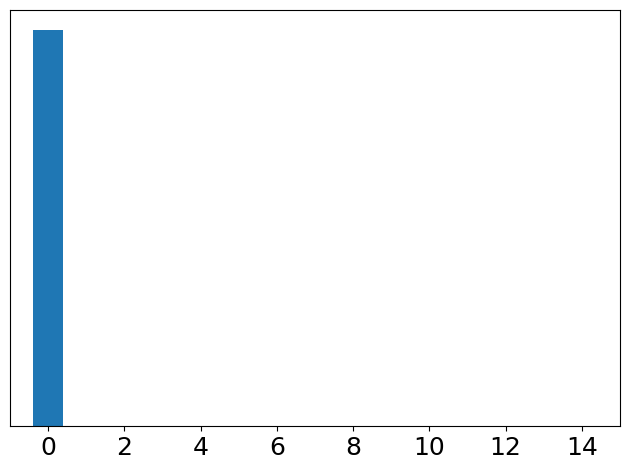

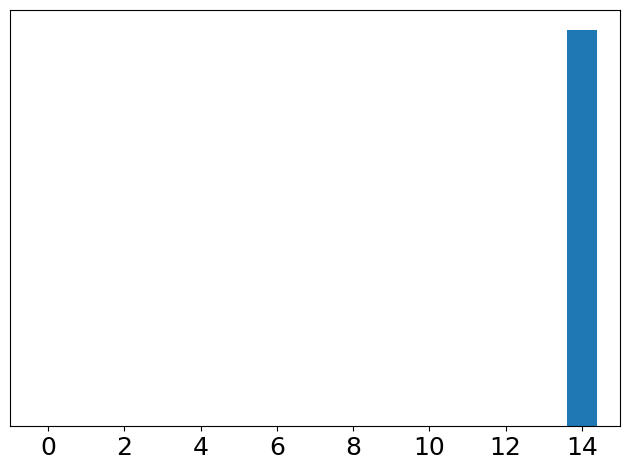

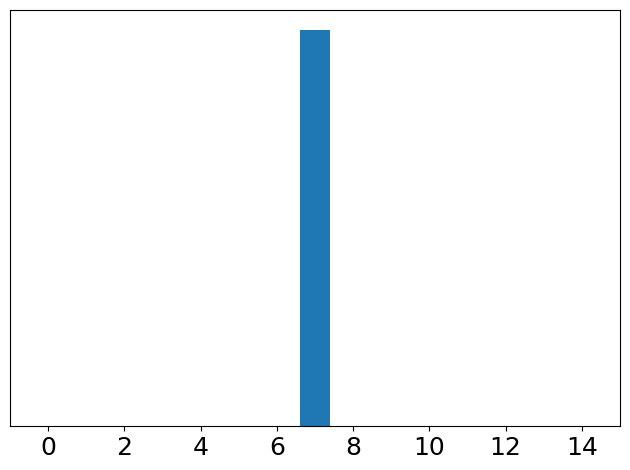

In [11]:
plot_centroid_distributions(kmeans_init, X, 3, 0, method='maxdist', num_runs=100)

**Your Answer:**

This plot makes sense as the maxdist initialization given a particular starting point ( in this case with point A as initialization it always returns the centroids as points A, H & O)

This is because after the first iteration it would always pick O as that is the furthest point away from A.

Then in the last iteration it would always pick H as the next centroid given that that point is the furthest away from either of the existing centroids (A or O). At the end of the second iteration points (A, B, C, F, G,K, L) would belong to cluster A and points (D, E, I, J, O, N, M) would belong to cluster O.

This leaves only point H which is currently equidistant and furthest point away from both A & O thus making this the last centroid.

However, with a different initialization of the first centroid the result would be completely different.

But the conclusion I can draw is that, given a specific initialization of the starting point the set of centroids outputted from the 'maxdist' initialization will always be unique. (0, 14, 7 in this particular case; but would be a different set of 3 numbers for a different starting centroid)

So in some sense, it is a more deterministic initialization method for sure but whether this actually helps in reaching convergence of all clusters cannot be predicted upfront as such a greedy method may not work for all kinds of datapoints.

#### 2.2 c) Interpreting KMeans++ Initialization (2 Points)

Run `plot_centroid_distributions` using the method **K-Means++** using the code below! The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the value of `num_runs`. Explain the results and discuss whether they meet your expectations of the method **K-Means++**! Use the markdown cell below the plots.

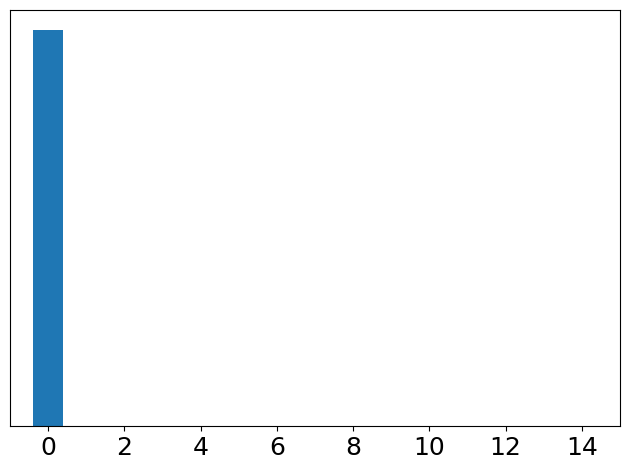

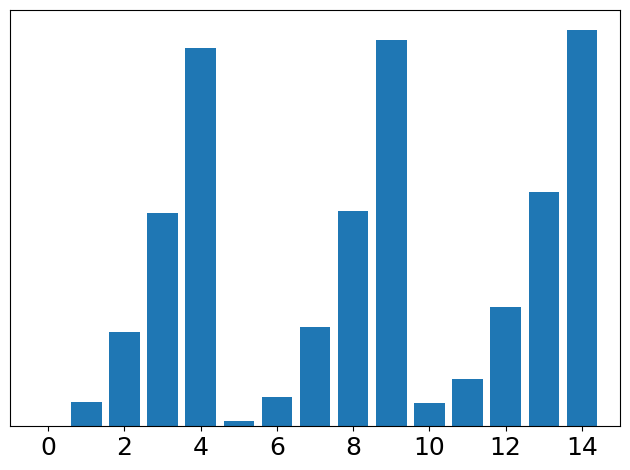

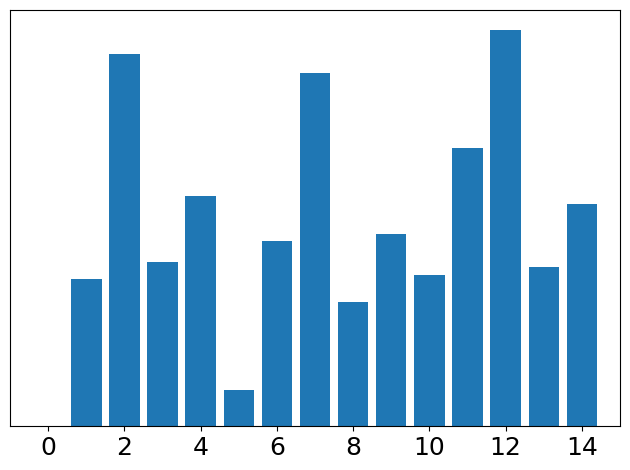

In [21]:
plot_centroid_distributions(kmeans_init, X, 3, 0, method='kmeans++', num_runs=100000)


**Your Answer:**

After changing the num of runs from 100 all the way to 100000, there were certain observations which clearly stood out.

At its core the KMeans++ is a probabilistic initialization algorithm where more weightage is given to points based on their $distance^2$, so it makes sense that for the 2nd and 3rd pick for centroids all the other values also make its way into the graph as bar lines.

However, on increasing the num_runs to a higher value it becomes clearer which points are being favoured in the second and third centroid picking process based on their frequencies.

For the second centroid pick, the points (E,J,O) which correspond to the points in the 3rd column are more preferred/frequent as these set of points are the furthest away from the intial centroid (point A) and they get picked more frequently based on their probability weightage as mentioned above.

For the third centroid pick, the points (C, H, M) which correspond to the points in the 2nd column are more preferred/frequent as these set of points are the furthest away from both centroids (assuming that the second point also falls in the last column as mentioned before). Since this is also chosen based on the probabilistic weightage proportional to $distance^2$ it makes sense that other points also show up in the graph although their frequencies are not as high due to this weightage given.

In conclusion, the kmeans++ intialization does an excellent job of spacing out the centroids in an even manner more often than not and sometimes we may even get lucky if different points are chosen as well due to the probabilistic nature of choosing points.

When compared with maxdist this is not a deterministic algorithm in the sense we always get the same points as the output but we almost always will be on the better end of the bargain as the probabilistic algorithm would space things out nicely which will help in the later iterations for better convergence overall.


### 2.3 Questions about K-Means (6 Points)

#### 2.3 a) Empty Cluster (3 Points)

**Outline all situations where K-Means may return at least 1 empty cluster!** To address this task, please make the following assumptions:
* The number of samples $N$ in the dataset is $N > 0$
* The number of clusters $K$ when running K-Means is $K \geq 2$
* The initialization of the initial centroids can be arbitrary good or bad

**Your Answer:**

- if some of the initialized centroids are too far away from the rest of the datapoints, the assignment step may result in these centroids not having any other points in its cluster due to the large distance as those points may get assigned to other centroids
- if the k value is higher than the number of "natural" clusters which might arise from the data, then what might happen is that as the iterations go on, the points which was once a part of some cluster may decide to move to other clusters ( as the centroid of those clusters change with every iteration) thereby resulting in empty clusters
- if there are outliers in the dataset it is possible that they may be assigned to clusters of their own leaving other clusters empty

#### 2.3 b) Outlier Detection (3 Points)

Recall the K-Means results in clusterings that are complete, i.e., each data point is assigned to a cluster. In contrast, DBSCAN has the notion of noise, i.e., points that are not part of any cluster, which can be used to identify outliers (see also Task 2). Now let's assume we want to identify outliers in a dataset but only have an implementation for K-Means available.

**Describe how we can use K-Means to identify outliers!** Since the notion of outliers is not well defined, it's not about having a fool-proof solution but to make a well-informed decision to limit the set of data points that are potential outliers.

**Your Answer:**

- Firstly we have to figure out the optimal k value using other methods for e.g by plotting the elbow curve, or using other metrics like the Silhouette coefficient
- We can then perform k means clustering using some random initialization of points. Following which we can detect outliers in the following ways:
- option 1
a. we can set some kind of outlier threshold distance ( lets call it x ).
b. if any cluster has points where that particular datapoint is very far away from its cluster centroid we can assume that to be an outlier as long as its greater than the threshold we have already set up. This would work , because whenever there are outliers, the centroid of the cluster would naturally stay closer to the rest of the datapoints in the cluster thereby ensuring that the outlier point has a large distance to its centroid.
c. we can then sort all the datapoints which are furthest away from its respective cluster's centroid in descending order and then filter only few of the datapoints which are really far away and are greater than the threshold
- option 2
In some cases , due to the cluster initialization step being closer to the outliers there may arise a situation where the outlier becomes a part of its own cluster as the iterations go on ( i.e. the outlier is the only point in the cluster). This way if we keep a look-out for clusters where the no of points inside the cluster are too less or are exactly one we can also classify those as outliers as well.